In [1]:
import pandas as pd
import numpy as np


from sklearn import preprocessing as prep
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

import plotly.graph_objects as go
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
import kaleido

# HeartDisease

In [2]:
dfHD = pd.read_excel('HeartDisease.xls') # Read the data
dfHD.info() # Obeserve wehter there is missing values in our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


* **</p>There is no any missing values in our data<p>** 

In [3]:
dfHD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


* **</p>The standard deviations of cp, fbs, exang, oldpeak, and ca are greater than their own mean, which indicates ther are high variation between values.<p>** 
* **</p>There is a great difference in each range among each variable.<p>**

## Question 1.

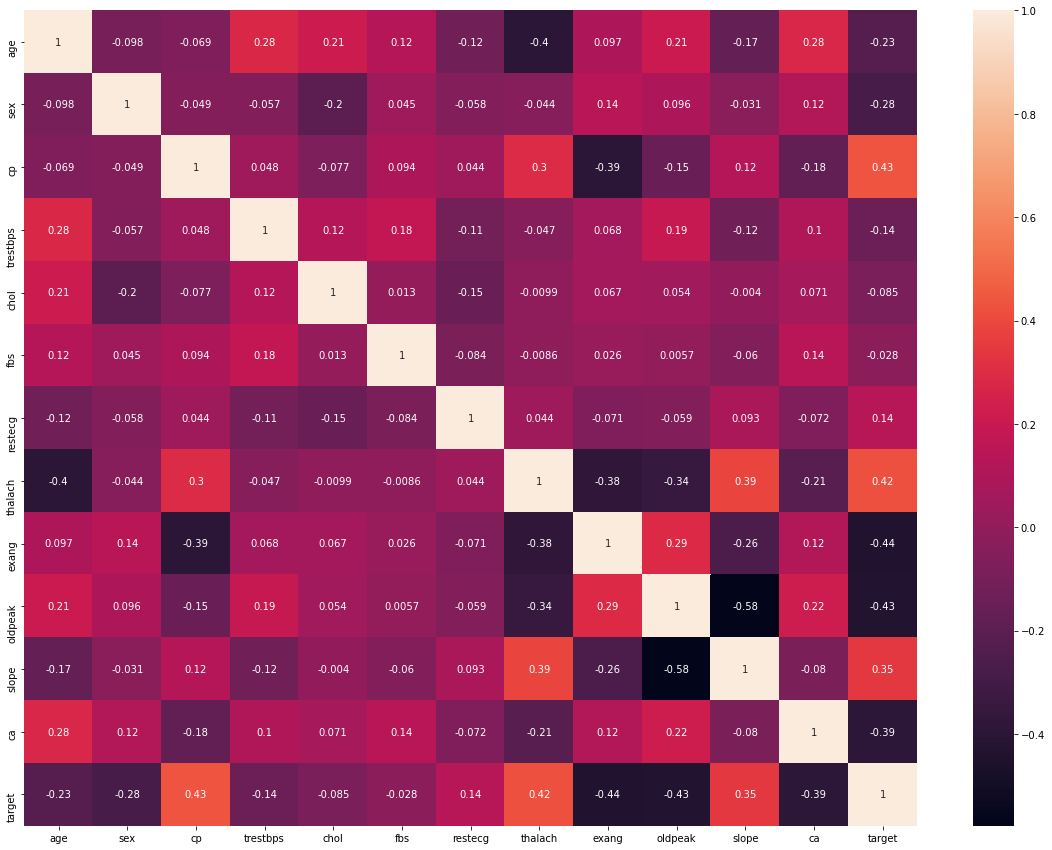

In [4]:
# Heatmap.
plt.figure(figsize=(20, 15))
sns.heatmap(dfHD.corr(),annot=True)
plt.show('png')

### partA
#### Choose which variables to include in your model and be sure to provide some explanation regarding that choice. In other words, tell me why you are choosing certain variables to be included in your model.
* **</p>I will choose a varaible as my predictor if its correaltion coefficient with target is greater than 0.3, so cp, thalach, exang, oldpeak, slope, and ca will be choosen.</p>**

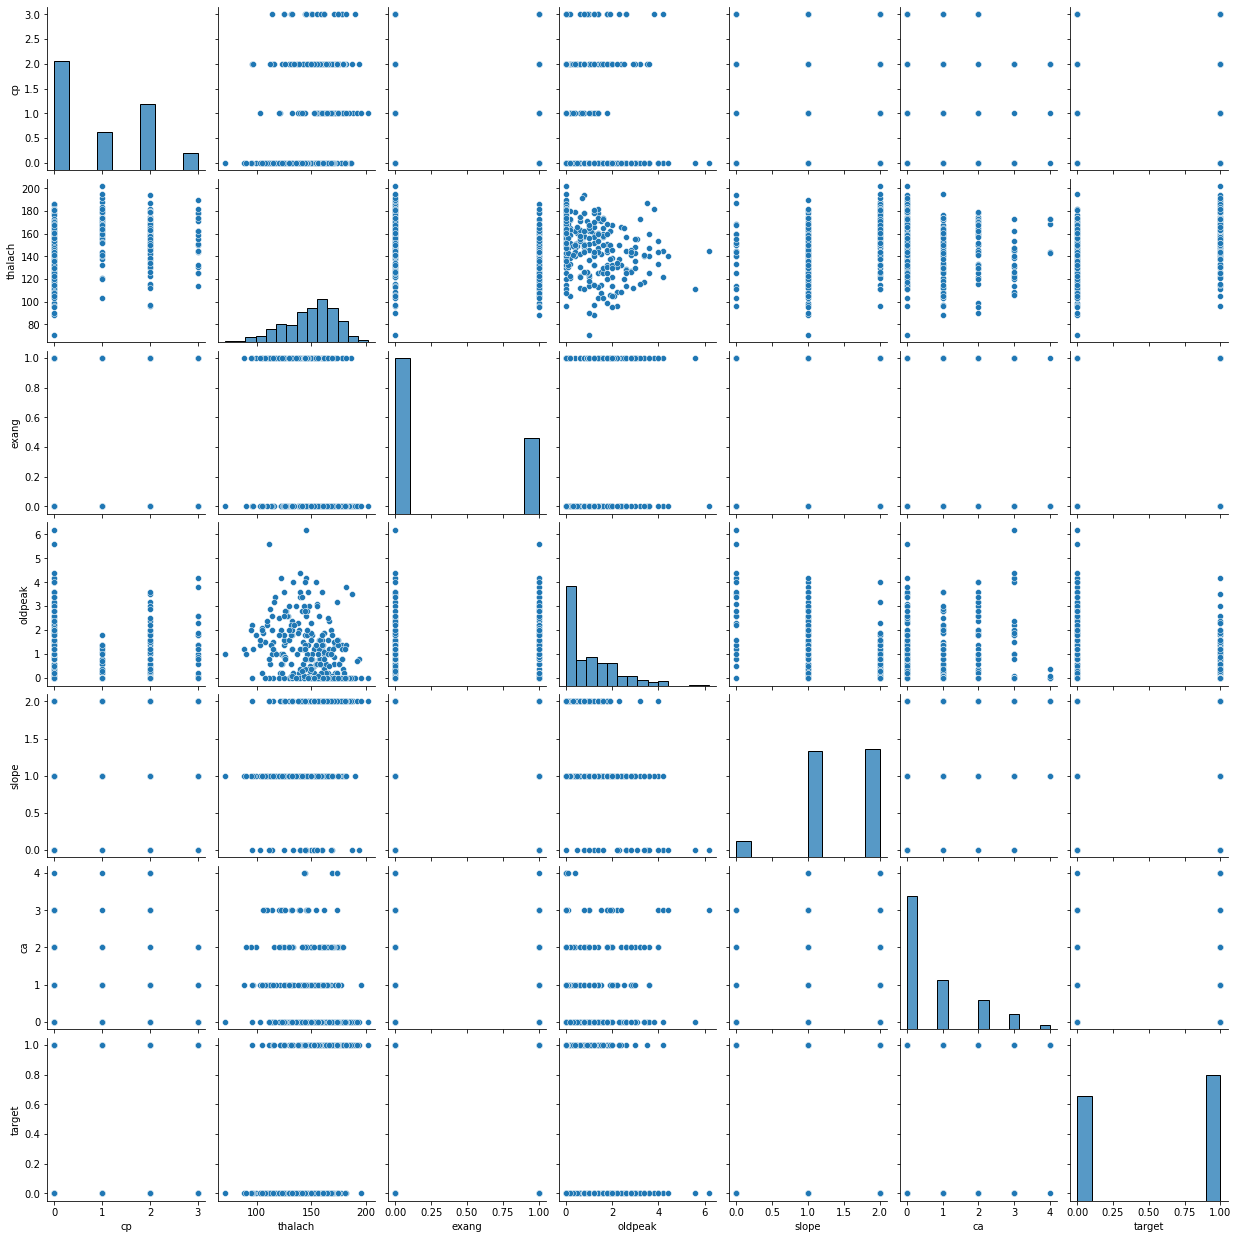

In [5]:
sns.pairplot(dfHD[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','target']]) # Plot

* **</p>By observing variable target, we can find this data balanced.<p>**

In [6]:
# Split Data
predictors = ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']
X = dfHD[predictors] 
y = dfHD['target'] 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1089)

In [7]:
# Normalize Data
X_train_means = X_train.mean()
X_train_std = X_train.std()

X_train = (X_train - X_train_means)/X_train_std
X_test = (X_test - X_train_means)/X_train_std

In [8]:
# Run LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [9]:
# Store predicted probability
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = log_reg.predict(X_test)

In [10]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []

# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(2)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(2)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)

# Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

,threshold,recall,FPR,FNR,F1_Score,Accuracy
0,0.0,1.00,1.00,0.00,0.71,0.55
1,0.1,1.00,0.61,0.00,0.80,0.73
2,0.2,1.00,0.54,0.00,0.82,0.76
3,0.3,1.00,0.44,0.00,0.85,0.80
4,0.4,1.00,0.39,0.00,0.86,0.82
5,0.5,0.94,0.32,0.06,0.85,0.82
6,0.6,0.88,0.27,0.12,0.84,0.81
7,0.7,0.76,0.17,0.24,0.80,0.79
8,0.8,0.66,0.15,0.34,0.74,0.75
9,0.9,0.38,0.10,0.62,0.52,0.62


### partB
#### choose a classification threshold and explain your choice.

* **</p>As shown in the table above, I will choose 0.4 as my threshold because both F1_Score and Accuracy at 0.4 are greater than others.<p>**

### partC
#### Explanations for a. and b. above should include discussion of some specific performance measures. What performance measures are you using and why?

* **</p>I will choose Accuracy or F1-Score as my performance measures becasue this data is balanced and because F1-Score is the combination of Recall and Precision, which means it can reflect whether our model can correctly identify positive cases and negative cases.<p>** 
* **</p>If we use Recall <p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the negative cases.</font>
* **</p>If we use FPR<p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the positive cases.</font>
* **</p>If we use FNR<p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the negative cases.</font>

In [11]:
y_pred_class_lr = binarize([y_pred_prob],threshold=0.4)[0]

# Create Metrics
confusion_lr = metrics.confusion_matrix(y_test, y_pred_class_lr)
recall_value_lr = metrics.recall_score(y_test, y_pred_class_lr).round(3)
fpr_value_lr = (confusion_lr[0,1] / (confusion_lr[0,1] + confusion_lr[0,0]) ).round(2)
fnr_value_lr = (confusion_lr[1,0] / (confusion_lr[1,0] + confusion_lr[1,1]) ).round(2)
f1_value_lr = metrics.f1_score(y_test, y_pred_class_lr).round(2)
accuracy_value_lr = metrics.accuracy_score(y_test, y_pred_class_lr).round(2)  

## Question 2.

In [12]:
# kNN
# Train a classifier for different values of k
results = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    confusion = metrics.confusion_matrix(y_test,y_pred_class)
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,knn.predict(X_test)),
                    'fnr':(confusion[1,0] / (confusion[1,0] + confusion[1,1])).round(3),
                    'f1_value':metrics.f1_score(y_test, y_pred_class).round(3),
                    'recall_value': metrics.recall_score(y_test, y_pred_class).round(3),
                    'precision_score': metrics.precision_score(y_test, y_pred_class).round(3)
                   })

# Convert results to Pandas dataframe
results = pd.DataFrame(results)

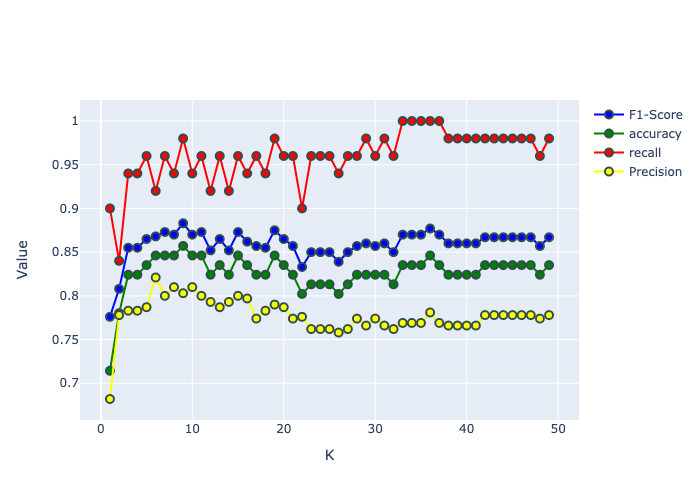

In [13]:
# Create Plot to observe different performance at different k
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=list(range(1,50)), 
                         y=results['f1_value'],
                         mode='lines+markers',
                         name='F1-Score',
                         marker=dict(size=8,
                                     color='blue',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))
fig.add_trace(go.Scatter(x=list(range(1,50)), 
                         y=results['accuracy'],
                         mode='lines+markers',
                         name='accuracy',
                         marker=dict(size=8,
                                     color='green',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=list(range(1,50)), 
                         y=results['recall_value'],
                         mode='lines+markers',
                         name='recall',
                         marker=dict(size=8,
                                     color='red',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=list(range(1,50)), 
                         y=results['precision_score'],
                         mode='lines+markers',
                         name='Precision',
                         marker=dict(size=8,
                                     color='yellow',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

# Edit the layout
fig.update_layout(
                   xaxis_title='K',
                   yaxis_title='Value')


fig.show('png')

### partA
#### Choose k, the number of neighbors to use in your classification. Why did you select that value?

* **</p>As shown in the plot above, when k is 9, F1-Score, accuracy, recall, and precision are all high. Although the highest recall occurs when k is euqal to 34, 35 or 36, however, other performance metrics are too low, so I will choose 9 as my k number. <p>**




### partB
#### You may choose to adjust your classification rule. Remember, by default, the rule is “majority rule.”  If we want a probability threshold that is different than 50%, you will have to use the “predict_proba()” function to compute class prediction probabilities and then feed those probabilities into the “binarize()” function to get class assignments based on a different probability threshold.

In [14]:
# k=9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [15]:
# Store predicted probability 
y_pred_prob = knn.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [16]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []


# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(3)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(3)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(3)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(3)
    
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)
  

    # Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

,threshold,recall,FPR,FNR,F1_Score,Accuracy
0,0.0,1.00,0.732,0.00,0.769,0.670
1,0.1,1.00,0.732,0.00,0.769,0.670
2,0.2,1.00,0.610,0.00,0.800,0.725
3,0.3,1.00,0.488,0.00,0.833,0.780
4,0.4,1.00,0.366,0.00,0.870,0.835
5,0.5,0.98,0.293,0.02,0.883,0.857
6,0.6,0.90,0.220,0.10,0.865,0.846
7,0.7,0.72,0.171,0.28,0.774,0.769
8,0.8,0.50,0.098,0.50,0.633,0.681
9,0.9,0.38,0.073,0.62,0.528,0.626


### partC 
#### In making your decisions regarding “k” and “majority rule”, be sure to discuss your goals (performance measures of interest).

* **</p>shown in the table in part A, when k is 9, F1-Score, accuracy, recall and precision are all high, so we choose 9 as our number. In part B, we are able to know when threshold is 0.5, Both F1-score and Accuracy are the highest among all thresholds, so we choose it as our threshold. Our goal is to select the value that can give us the highest F1-score and Accuracy.<p>**

In [17]:
knn = KNeighborsClassifier(n_neighbors=9)
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
# Create Metrics
confusion_knn = metrics.confusion_matrix(y_test, y_pred_class)
recall_value_knn = metrics.recall_score(y_test, y_pred_class).round(3)
fpr_value_knn = (confusion_knn[0,1] / (confusion_knn[0,1] + confusion_knn[0,0]) ).round(2)
fnr_value_knn = (confusion_knn[1,0] / (confusion_knn[1,0] + confusion_knn[1,1]) ).round(2)
f1_value_knn = metrics.f1_score(y_test, y_pred_class).round(2)
accuracy_value_knn = metrics.accuracy_score(y_test, y_pred_class).round(2)

## Question 3.

In [18]:
report=pd.DataFrame({'Method':['LogReg','kNN'],
                     'Recall':[recall_value_lr,recall_value_knn],
                     'FPR':[fpr_value_lr,fpr_value_knn],
                     'FNR':[fnr_value_lr,fnr_value_knn],
                     'FI':[f1_value_lr,f1_value_knn],
                     'Accuracy':[accuracy_value_lr,accuracy_value_knn]
                    })
report

,Method,Recall,FPR,FNR,FI,Accuracy
0,LogReg,1.00,0.39,0.00,0.86,0.82
1,kNN,0.98,0.29,0.02,0.88,0.86


#### Compare and contrast your LR and kNN results. If you had to choose between these methods, which method would you choose for each dataset?
* **</p>In this data, kNN has better perfomances on F1 and Accuracy, so I will go for kNN.<p>**